In [1]:
import pandas as pd

# Load from your saved CSV
df = pd.read_csv('backup_before_symptom_encoding2.csv')

# Preview
df.head()


,age,gender,pregnancies,bmi,family_history,high_bp,activity,sugar_intake,diabetes_risk
0,65,0,0,20.7,0,0,1,1,1
1,77,1,3,26.7,0,0,1,0,1
2,38,1,5,31.3,0,0,0,1,2
3,20,0,0,38.5,0,0,1,3,2
4,20,0,0,37.5,0,1,0,3,2


In [2]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('diabetes_risk', axis=1)
y = df['diabetes_risk']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [3]:
from xgboost import XGBClassifier

# Initialize model
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',  # for multi-class classification
    random_state=42
)

# Train model
model.fit(X_train, y_train)

c:\Users\thiag\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:09:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict
y_pred = model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.84      0.88      0.86        78
           2       0.89      0.89      0.89       105

    accuracy                           0.88       200
   macro avg       0.89      0.85      0.86       200
weighted avg       0.88      0.88      0.87       200


Confusion Matrix:
 [[13  2  2]
 [ 0 69  9]
 [ 1 11 93]]


<Figure size 1000x600 with 0 Axes>

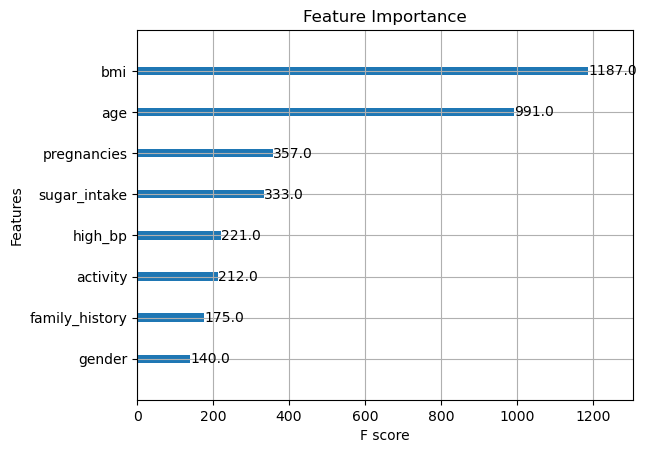

In [5]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(model)
plt.title('Feature Importance')
plt.show()

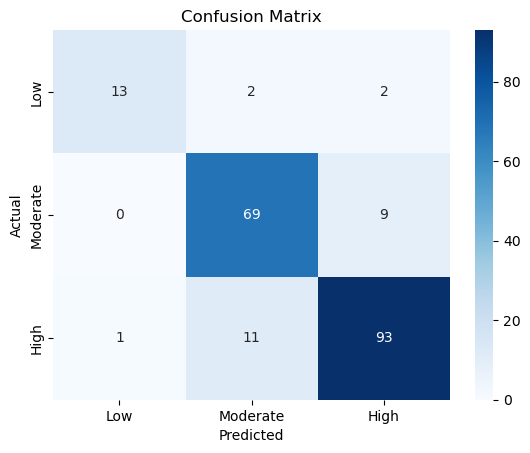

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Moderate', 'High'], yticklabels=['Low', 'Moderate', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [7]:
import joblib
joblib.dump(model, 'xgboost_diabetes_model.pkl')

['xgboost_diabetes_model.pkl']

In [6]:
import xgboost as xgb
import joblib

# Load the old model saved with joblib
model = joblib.load("xgboost_diabetes_model.pkl")

# Save it properly using Booster's save_model method
model.get_booster().save_model("xgboost_diabetes_model.json")

In [8]:
import xgboost as xgb

model = xgb.Booster()
model.load_model("xgboost_diabetes_model.json")

print(model.feature_names)  # Check if names exist

['age', 'gender', 'pregnancies', 'bmi', 'family_history', 'high_bp', 'activity', 'sugar_intake']


In [9]:
import xgboost as xgb

# Load model
model = xgb.Booster()
model.load_model("xgboost_diabetes_model.json")

# Print feature names expected by the model
print("Model Feature Names:", model.feature_names)

Model Feature Names: ['age', 'gender', 'pregnancies', 'bmi', 'family_history', 'high_bp', 'activity', 'sugar_intake']


In [10]:
import xgboost as xgb

# Load model
model = xgb.Booster()
model.load_model("xgboost_diabetes_model.json")

# Print feature names and their expected types
feature_names = model.feature_names

# Define expected data types manually based on how you trained the model
expected_data_types = {
    "age": int,
    "gender": int,
    "pregnancies": int,
    "bmi": float,
    "family_history": int,
    "high_bp": int,
    "activity": int,
    "sugar_intake": int
}

# Print feature names with expected types
if feature_names:
    print("Model expects the following features:")
    for feature in feature_names:
        dtype = expected_data_types.get(feature, "Unknown")  # Use "Unknown" if not found
        print(f"- {feature}: {dtype.__name__}")
else:
    print("Feature names are not available in the model.")

Model expects the following features:
- age: int
- gender: int
- pregnancies: int
- bmi: float
- family_history: int
- high_bp: int
- activity: int
- sugar_intake: int
